In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/customdataset/maestro-v3.0.0.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canonical_composer  1276 non-null   object 
 1   canonical_title     1276 non-null   object 
 2   split               1276 non-null   object 
 3   year                1276 non-null   int64  
 4   midi_filename       1276 non-null   object 
 5   audio_filename      1276 non-null   object 
 6   duration            1276 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 69.9+ KB


In [3]:
df.head(5)

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508


In [4]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the numerical and categorical columns
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: ['year', 'duration']
Categorical columns: ['canonical_composer', 'canonical_title', 'split', 'midi_filename', 'audio_filename']


In [5]:
# Compute summary statistics for numerical columns
num_summary = df[num_cols].describe()
num_summary

,year,duration
count,1276.000000,1276.000000
mean,2011.302508,560.463595
std,4.353338,443.057431
min,2004.000000,45.155208
25%,2008.000000,261.981576
50%,2011.000000,429.168241
75%,2015.000000,685.018817
max,2018.000000,2624.663508


In [6]:
# Compute frequency counts for categorical columns
cat_summary = pd.DataFrame(columns=cat_cols)

for col in cat_cols:
    cat_summary[col] = df[col].value_counts()

In [13]:
df.groupby("split").size()

split
test          177
train         962
validation    137
dtype: int64

In [14]:
df.groupby("year").size()

year
2004    132
2006    115
2008    147
2009    125
2011    163
2013    127
2014    105
2015    129
2017    140
2018     93
dtype: int64

<AxesSubplot: >

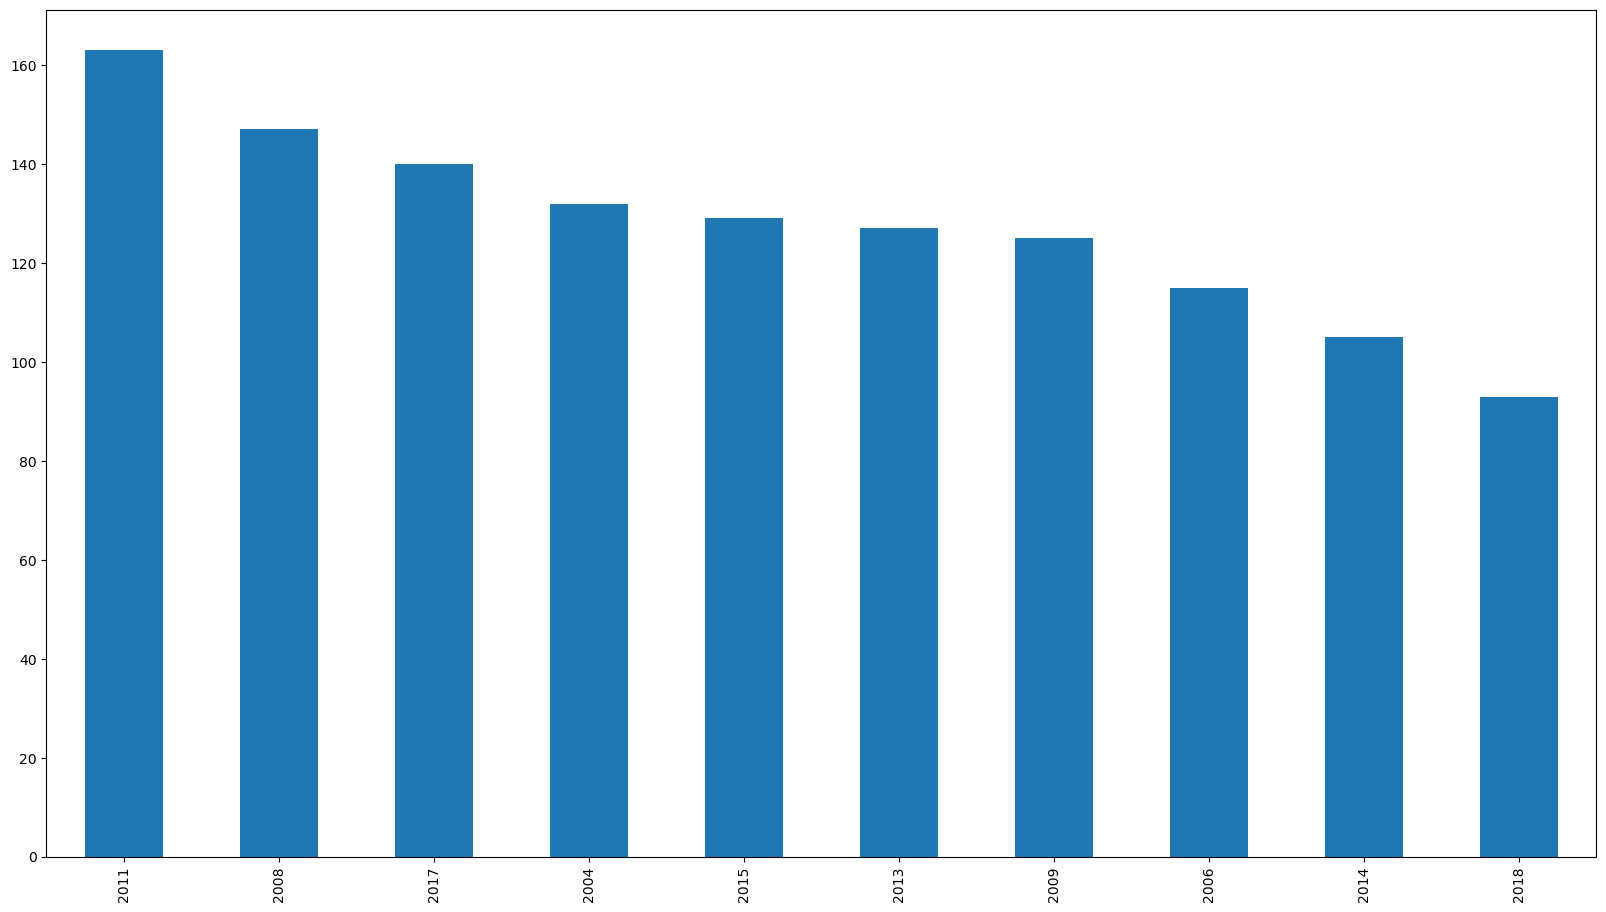

In [26]:
df['year'].value_counts().plot(kind='bar', figsize=(20, 11))

In [8]:
# Compute summary statistics for each column
summary_stats = df.describe(include='all')
summary_stats

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
count,1276,1276,1276,1276.000000,1276,1276,1276.000000
unique,60,854,3,NaN,1276,1276,NaN
top,Frédéric Chopin,"Thirty-Two Variations in C Minor, WoO 80",train,NaN,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,NaN
freq,201,18,962,NaN,1,1,NaN
mean,NaN,NaN,NaN,2011.302508,NaN,NaN,560.463595
std,NaN,NaN,NaN,4.353338,NaN,NaN,443.057431
min,NaN,NaN,NaN,2004.000000,NaN,NaN,45.155208
25%,NaN,NaN,NaN,2008.000000,NaN,NaN,261.981576
50%,NaN,NaN,NaN,2011.000000,NaN,NaN,429.168241
75%,NaN,NaN,NaN,2015.000000,NaN,NaN,685.018817


In [9]:
# Print the summary statistics
print("\nCategorical summary:")
print(cat_summary[['canonical_composer']])



Categorical summary:
                                                    canonical_composer
Frédéric Chopin                                                    201
Franz Schubert                                                     186
Ludwig van Beethoven                                               146
Johann Sebastian Bach                                              145
Franz Liszt                                                        131
Sergei Rachmaninoff                                                 59
Robert Schumann                                                     49
Claude Debussy                                                      45
Joseph Haydn                                                        40
Wolfgang Amadeus Mozart                                             38
Alexander Scriabin                                                  35
Domenico Scarlatti                                                  31
Felix Mendelssohn                                      

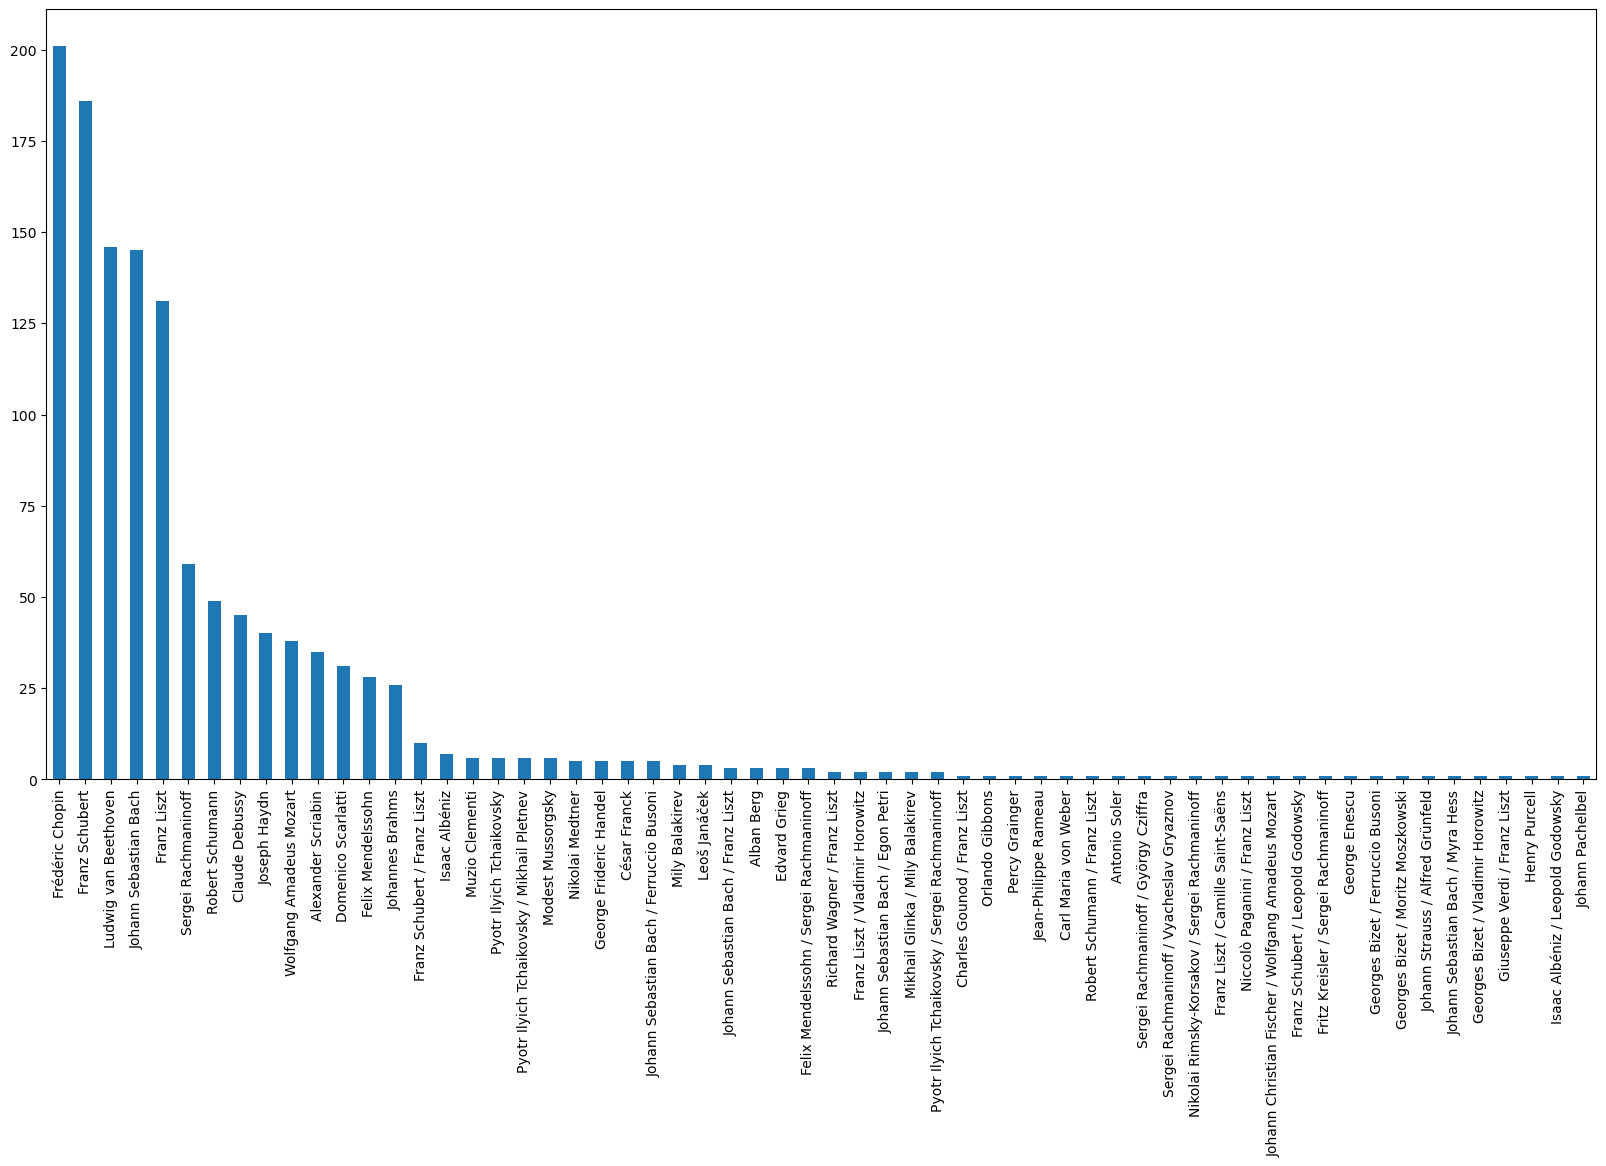

In [10]:
df['canonical_composer'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.show()

<AxesSubplot: >

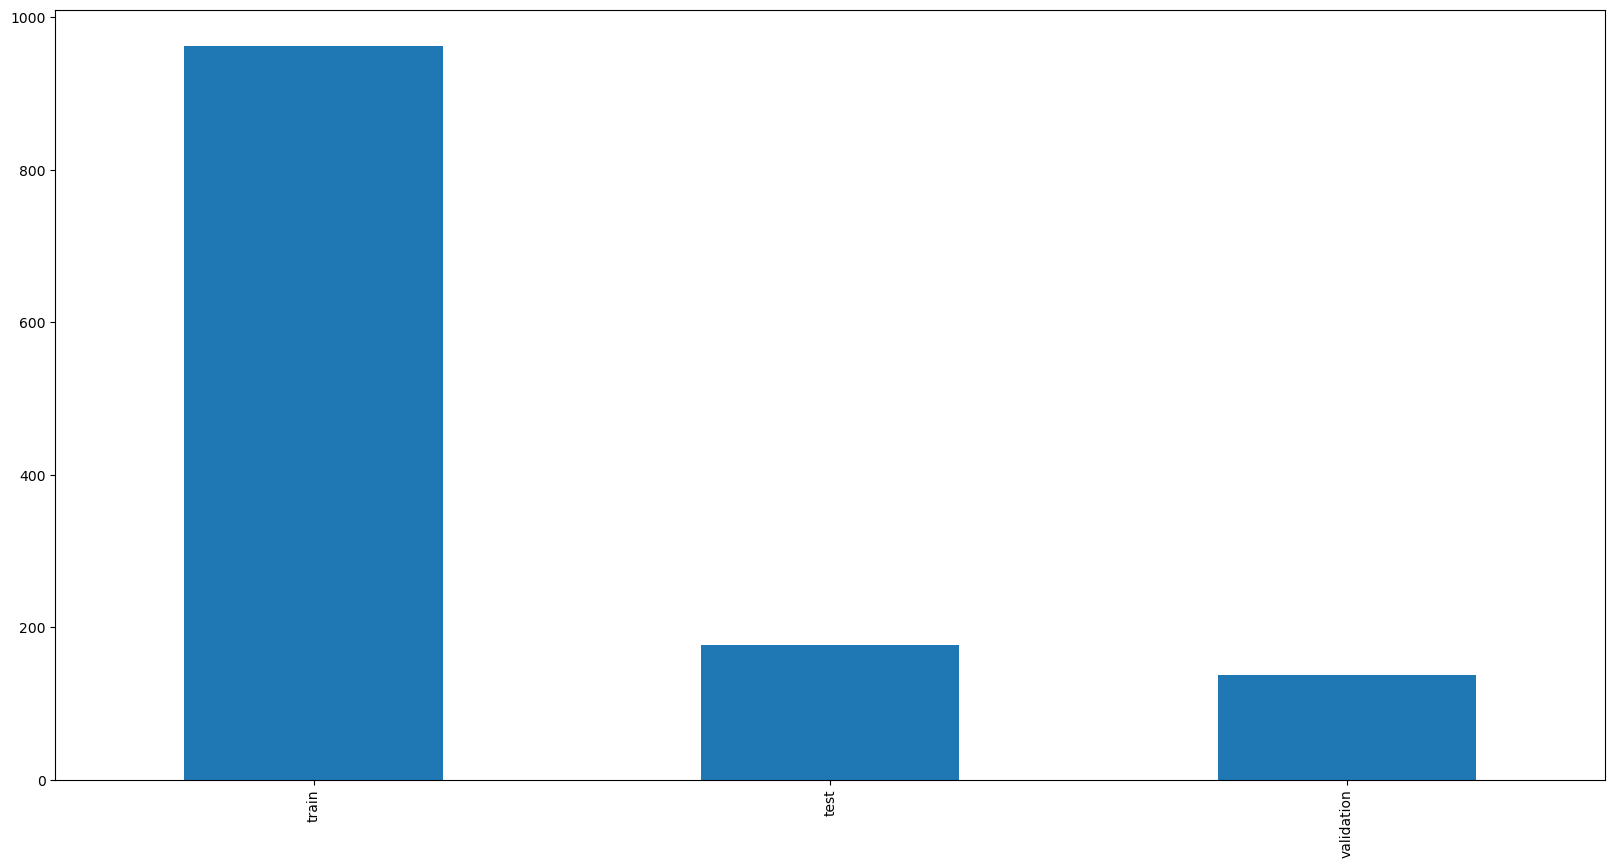

In [22]:
df['split'].value_counts().plot(kind='bar', figsize=(20, 10))
